In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
import seaborn as sns
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.cluster

import os
from yellowbrick.cluster import SilhouetteVisualizer

#from sklearn_som.som import SOM

C:\Users\met48\AppData\Local\Temp\ipykernel_11688\492761263.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
print(os.getcwd())

C:\Users\met48\Desktop\TS-Clustering


In [5]:
bank_PCA = pd.read_csv("extracted_features/bank_reserves_PCA.csv")

/Users/maria/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maria/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maria/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maria/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maria/anacond

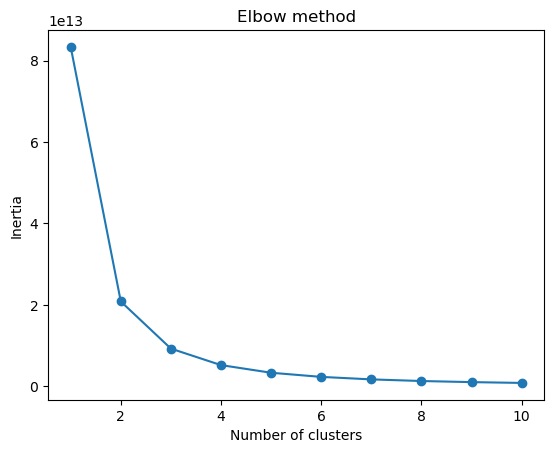

In [8]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(bank_PCA)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(bank_PCA)

KMeans(n_clusters=2)

In [8]:
seed = 0
np.random.seed(seed)
bank_poor_ts = pd.read_csv('SimData/bank_reserves_outputs_poor.csv')
X_train_poor = to_time_series_dataset(bank_poor_ts)
sz = X_train_poor.shape[1]

4458.212 --> 2894.451 --> 2758.420 --> 2675.436 --> 2611.427 --> 2580.454 --> 2568.395 --> 2562.635 --> 2558.589 --> 2555.423 --> 2552.405 --> 2550.112 --> 2548.198 --> 2546.515 --> 2545.059 --> 2543.810 --> 2542.556 --> 2541.428 --> 2540.386 --> 2539.427 --> 2538.477 --> 2537.548 --> 2536.632 --> 2535.801 --> 2535.132 --> 2534.666 --> 2534.251 --> 2533.870 --> 2533.525 --> 2533.138 --> 2532.771 --> 2532.451 --> 2532.177 --> 2531.919 --> 2531.713 --> 2531.499 --> 2531.217 --> 2530.928 --> 2530.664 --> 2530.413 --> 2530.219 --> 2530.051 --> 2529.911 --> 2529.816 --> 2529.743 --> 2529.689 --> 2529.647 --> 2529.595 --> 2529.535 --> 2529.462 --> 


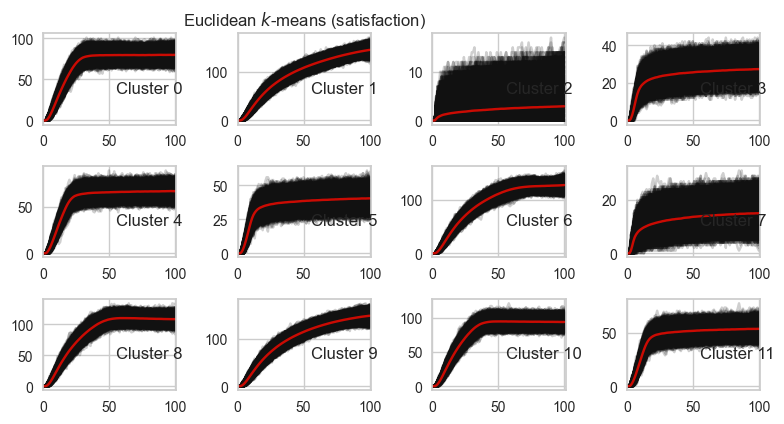

In [9]:
km = TimeSeriesKMeans(n_clusters=12, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train_poor)
plt.figure()
for yi in range(12):
    plt.subplot(4, 4, yi + 1)
    for xx in X_train_poor[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    #plt.ylim(0, 100)
    plt.text(0.55, 0.35,'Cluster %d' % (yi),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means (satisfaction)")
        
plt.tight_layout()
#plt.savefig('schelling_satisfaction_ts.svg')
plt.show()

In [11]:
y_pred

array([ 3,  2,  1, ..., 10,  4, 11], dtype=int64)

In [12]:
X_train_poor[y_pred == 1]

array([[[  0.],
        [  0.],
        [  0.],
        ...,
        [146.],
        [148.],
        [151.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [147.],
        [147.],
        [143.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [147.],
        [144.],
        [145.]],

       ...,

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [136.],
        [138.],
        [133.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [140.],
        [140.],
        [148.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [145.],
        [151.],
        [144.]]])

In [15]:
km.cluster_centers_[1].ravel()

array([  0.        ,   0.        ,   0.        ,   0.83736743,
         2.57005125,   5.05267164,   8.0571878 ,  11.46643325,
        15.04470493,  18.77642462,  22.54315725,  26.29497133,
        29.95950677,  33.5501091 ,  37.0656112 ,  40.46587507,
        43.72720353,  46.85862891,  49.9281981 ,  52.87882478,
        55.70391232,  58.46130816,  61.05434617,  63.60455676,
        66.03308469,  68.40300401,  70.66164307,  72.78368093,
        74.83203938,  76.89475821,  78.82970518,  80.68955194,
        82.58329528,  84.35677678,  86.07033034,  87.75607652,
        89.36758512,  90.8863348 ,  92.42741158,  93.94362409,
        95.38169178,  96.82772619,  98.19404273,  99.54285279,
       100.86456589, 102.10052266, 103.35941544, 104.52681788,
       105.69361141, 106.86126757, 108.04896737, 109.16669204,
       110.25133201, 111.28162582, 112.32450398, 113.28264069,
       114.30263358, 115.28634495, 116.26853402, 117.18049424,
       118.11716649, 119.04039174, 119.93890496, 120.82